In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr
%matplotlib inline 

In [3]:
df=pd.read_csv('../fpvi/top2018.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


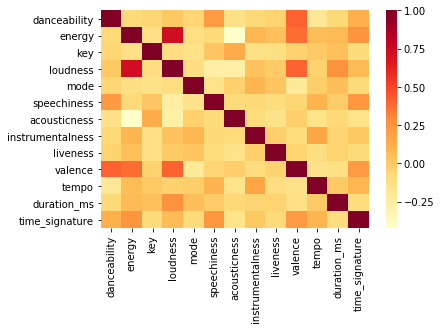

In [5]:
sns.heatmap(df.corr(),cmap="YlOrRd")

In [6]:
df['Rhythm']=df['tempo']

In [7]:
df.loc[df['tempo']>168,'Rhythm']='Presto'
df.loc[(df['tempo']>=110) & (df['tempo']<=168),'Rhythm']='Allegro'
df.loc[(df['tempo']>=76) & (df['tempo']<=108),'Rhythm']='Andante'
df.loc[(df['tempo']>=66) & (df['tempo']<=76),'Rhythm']='Adagio'
df.loc[df['tempo']<65,'Rhythm']='Length'

In [8]:
df['Rhythm'].value_counts()

Allegro    47
Andante    44
Presto      7
Adagio      1
Length      1
Name: Rhythm, dtype: int64

In [9]:
top_artists = df.groupby('artists').id.count().sort_values(ascending=False).iloc[:19]
top_artists.head()

artists
XXXTENTACION    6
Post Malone     6
Drake           4
Ed Sheeran      3
Marshmello      3
Name: id, dtype: int64

Text(0.5,1,'Length of the song name in characters')

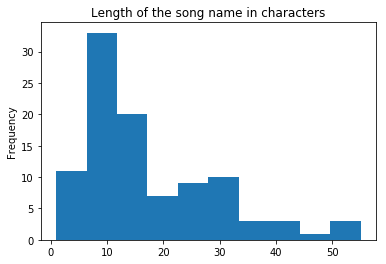

In [14]:
df["name_len"] = df["name"].apply(lambda x: len(x))
df["name_len"].plot(kind="hist")
plt.title("Length of the song name in characters")

In [16]:
def get_additional_info_from_songname(songname, info_needed = "songname"):
    """
    Accepts:
        songname (str). String from dataframe.
        info_needed (str). Either "songname" (cleaned from <feat.> and <with>) or 
                           "coauthor" (in colab with whom this song was recorded) or
                           "wordcount" (how many words the title contains)
    Splits it.
    Finds <(feat.> and <(with> parts.
    Gets rid of them.
    Returns either the length of a song name without this additional info or the info itself.
    """
    song_components = songname.split()
    
    if "(feat." in song_components:
        if info_needed == "songname":
            return " ".join(song_components[ : song_components.index("(feat.")])
        if info_needed == "coauthor":
            coauth = song_components[song_components.index("(feat.")+1:]
            # this is to get rid of the last parenthesis
            coauth[-1] = coauth[-1][:-1]
            return " ".join(coauth)
        if info_needed == "wordcount":
            return len(song_components[ : song_components.index("(feat.")])
    elif "(with" in song_components:
        if info_needed == "songname":
            return " ".join(song_components[ : song_components.index("(with")])
        if info_needed == "coauthor":
            coauth = song_components[song_components.index("(with")+1:]
            # this is to get rid of the last parenthesis
            coauth[-1] = coauth[-1][:-1]
            return " ".join(coauth)
        if info_needed == "wordcount":
            return len(song_components[ : song_components.index("(with")])
    else:
        # if there was no feat. or with in the song title
        if info_needed == "songname":
            return songname
        elif info_needed == "coauthor":
            return "No colab"
        elif info_needed == "wordcount":
            return len(songname.split())

In [17]:
df["collaborator"] = df["name"].apply(
                                lambda x: get_additional_info_from_songname(x,
                                                                            info_needed="coauthor"))

In [18]:
df["is_collab"] = df["collaborator"].apply(lambda x: 0 if x == "No colab" else 1)

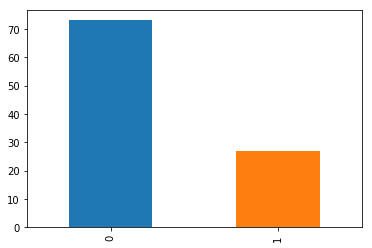

In [20]:
df["is_collab"].value_counts().plot(kind="bar")

([<matplotlib.axis.XTick at 0x2085e292b00>,
 <a list of 2 Text xticklabel objects>)

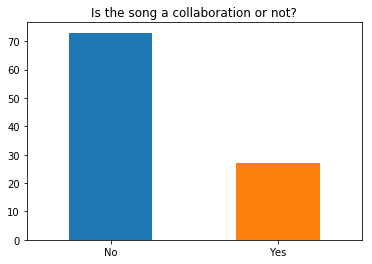

In [22]:
df["is_collab"].value_counts().plot(kind="bar")
plt.title("Is the song a collaboration or not?")
plt.xticks([0,1],["No", "Yes"], rotation=0)